# Python-Pandas-Titanic-Missing-Data-Tutorial

**A comprehensive, step-by-step guide to handling missing data in the Titanic dataset using Python's Pandas library.**

### 1. Setting Up Your Environment and Importing Libraries

Before we start working with data, we need to make sure our Python environment is ready. This involves importing the necessary libraries that provide the tools we'll use for data manipulation, analysis, and visualization.

#### Step 1.1: Import Essential Libraries

**Explanation:**
We import pandas for data manipulation, numpy for numerical operations (especially useful for handling NaN values), matplotlib.pyplot for basic plotting, and seaborn for creating more aesthetically pleasing and informative statistical graphics. These are the cornerstones of almost any data science project in Python.

In [1]:
# You might need to install libraries first:
# %pip install pandas numpy matplotlib seaborn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for seaborn plots for better aesthetics
sns.set_style("whitegrid")
# This ensures that your plots look good right out of the box.

**The Logic Behind**
    
    pandas: It's the primary tool for working with tabular data (like CSV files) in Python. It provides DataFrames, which are highly efficient and flexible for data handling.

    numpy: Often works hand-in-hand with Pandas for numerical computations, especially when dealing with missing values (e.g., np.nan).

    matplotlib.pyplot & seaborn: Data visualization is crucial for understanding the distribution of missing values and for exploring relationships in the data before and after cleaning. Seaborn builds on Matplotlib to create more visually appealing plots with less code.

### 2. Loading the Dataset
We are taking our train.csv file from disk storage and "loading" or "reading" its contents into our Python environment. Specifically, we're converting it into a Pandas DataFrame, which is an in-memory, structured representation of our data, making it ready for analysis.

#### Step 2.1: Define File Path

**Explanation:**
We first define the file_path variable to point to our train.csv file. If the CSV file is in the same directory as your Jupyter Notebook, just the filename is enough. If it's in a subdirectory (e.g., data/), you'd specify data/train.csv. For files located elsewhere, you'd use the absolute path.

In [3]:
# Assuming 'train.csv' is in the same directory as this Jupyter Notebook
file_path = 'train.csv'

# If your CSV is in a 'data' folder:
# file_path = 'data/train.csv'

# Or an absolute path (Windows example, note 'r' for raw string or use forward slashes):
# file_path = r'C:\Users\YourUser\Documents\PythonProjects\TitanicData\train.csv'

**The Logic Behind**

    Defining the file path makes our code more readable and easier to modify if the file location changes. It's a good practice to keep paths as variables.

#### Step 2.2: Read the CSV File into a Pandas DataFrame

**Explanation:**
The pd.read_csv() function is the workhorse here. It reads the comma-separated values from our train.csv file and transforms them into a tabular DataFrame object in our computer's memory. We store this DataFrame in a variable typically named df. We also include a try-except block for robust error handling, informing the user if the file isn't found or if there's another issue during reading.

In [4]:
try:
    df = pd.read_csv(file_path)
    print("CSV file successfully read and loaded into a DataFrame!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path or ensure the file is in the correct directory.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty. Make sure it contains data.")
except Exception as e:
    print(f"An unexpected error occurred while reading the file: {e}")

CSV file successfully read and loaded into a DataFrame!


**The Logic Behind**

    This is the core step to get our raw data into a usable format for Python. The Pandas DataFrame is optimized for data analysis tasks, allowing for efficient querying, manipulation, and computation. The try-except block makes our code more robust and user-friendly, preventing crashes due to common issues like a missing file.

### 3. Initial Data Inspection and Understanding Missing Values

After loading the data, it's crucial to get a first impression. We'll check the basic structure, data types, and, most importantly for this tutorial, identify where and how many missing values exist in our dataset.

#### Step 3.1: Display the First Few Rows (df.head())

**Explanation:**
df.head() prints the first 5 rows of our DataFrame by default. This gives us a quick glimpse of the data, column names, and the type of values they contain.

In [5]:
print("\nFirst 5 rows of the DataFrame:")
print(df.head())


First 5 rows of the DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373

**The Logic Behind**

    df.head() is essential for sanity checks. It helps confirm that the data loaded correctly, the columns are as expected, and we can quickly spot obvious data issues or unexpected formats.

#### Step 3.2: Get Summary Information About the DataFrame (df.info())

**Explanation:**
df.info() provides a concise summary of the DataFrame. It shows:

--The number of entries (rows).

--The total number of columns.

--Each column's name, the count of non-null values, and its data type (dtype).

--Memory usage.

The "Non-Null Count" is especially important for identifying missing values: if it's less than the total number of entries, that column contains missing data.



In [7]:
print("\nGeneral information about the DataFrame:")
df.info()


General information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**The Logic Behind**
    
    df.info() is a powerful first diagnostic tool. It quickly reveals data types (e.g., object for strings, int64 for integers, float64 for decimals), which is crucial for subsequent operations. More importantly, it directly tells us which columns have missing values and how many, without needing further calculations.



#### Step 3.3: Calculate the Number and Percentage of Missing Values (df.isnull().sum())

Explanation:
This is the most direct way to quantify missing values.

-- df.isnull(): Returns a DataFrame of boolean values (True for missing, False for not missing) for every cell.

-- .sum(): When applied to the boolean DataFrame, True is treated as 1 and False as 0. So, sum() for each column counts the number of True values, effectively counting the missing values in each column.

-- Dividing by len(df) (total rows) and multiplying by 100 gives the percentage.

In [8]:
print("\nNumber of missing values per column:")
missing_values_count = df.isnull().sum()
print(missing_values_count)

print("\nPercentage of missing values per column:")
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values_percentage.round(2)) # Round to 2 decimal places for readability


Number of missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of missing values per column:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


**The Logic Behind**

Knowing the exact count and percentage of missing values per column is critical for deciding on the appropriate strategy for handling them. For example, a column with 90% missing values might be dropped, while a column with 5% missing values might be imputed.

4. Visualizing Missing Data Patterns

What are we doing here?

Beyond just numbers, visualizing missing data helps us understand the patterns of missingness. Are values missing randomly? Are they missing in specific columns together? Visuals provide insights that raw numbers might miss.

Step 4.1: Visualize Missing Data with a Heatmap (Seaborn)

Explanation:
A heatmap can visually represent where missing values are located across your DataFrame.

    df.isnull(): Again, creates a boolean DataFrame (True for missing).

    sns.heatmap(): Creates a heatmap from this boolean DataFrame.

    cbar=False: Hides the color bar as we're only interested in presence/absence.

    cmap='viridis' (or 'rocket', 'flare'): Sets the color scheme. Different colors can represent missing vs. non-missing values clearly.

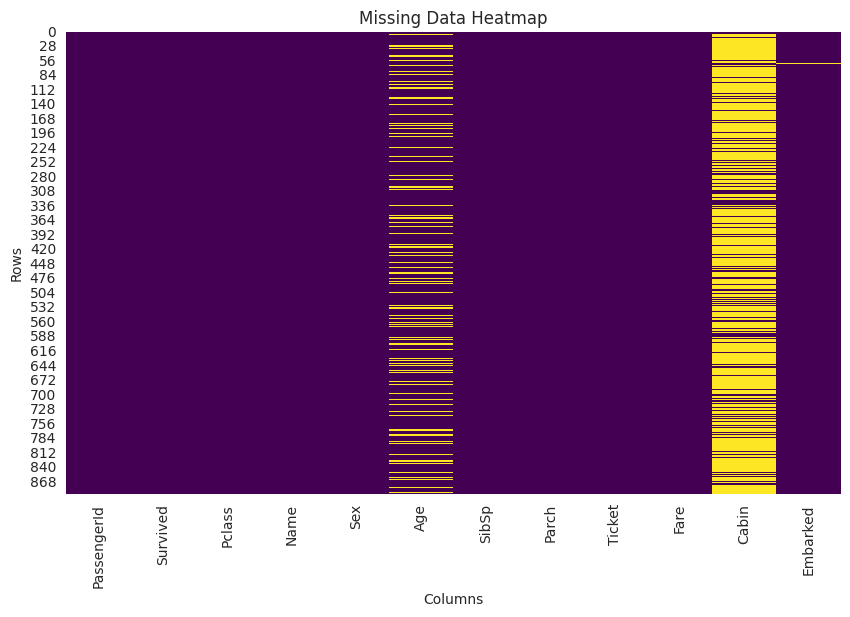

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') # Using 'viridis' colormap
plt.title('Missing Data Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

    A heatmap provides an immediate visual summary of missingness. We can quickly spot:

    --Columns with many missing values (e.g., Cabin will likely show a solid block of one color).

    --Columns with no missing values (e.g., PassengerId, Survived).

    --Potential patterns, like if missingness in one column correlates with missingness in another. This guides our imputation strategy.

Step 4.2: Visualize Missing Data with missingno (Optional, but Powerful)

Explanation:
The missingno library is specifically designed for visualizing missing data. Its matrix() function creates a nullity matrix, similar to a heatmap, but often with more detailed visual cues about nullity. The bar() function provides a bar chart of missing values per column.


Missing Data Matrix (missingno.matrix):


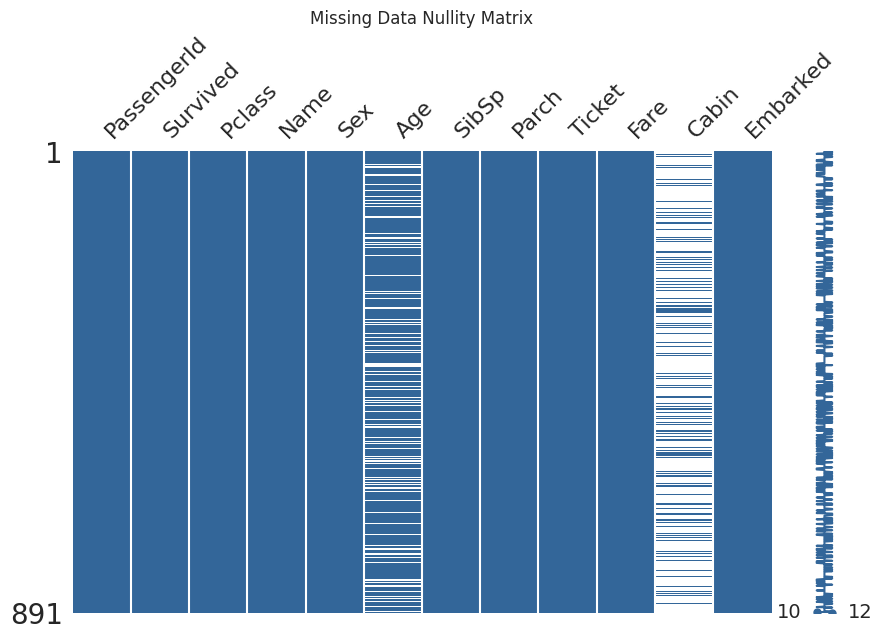


Missing Data Bar Chart (missingno.bar):


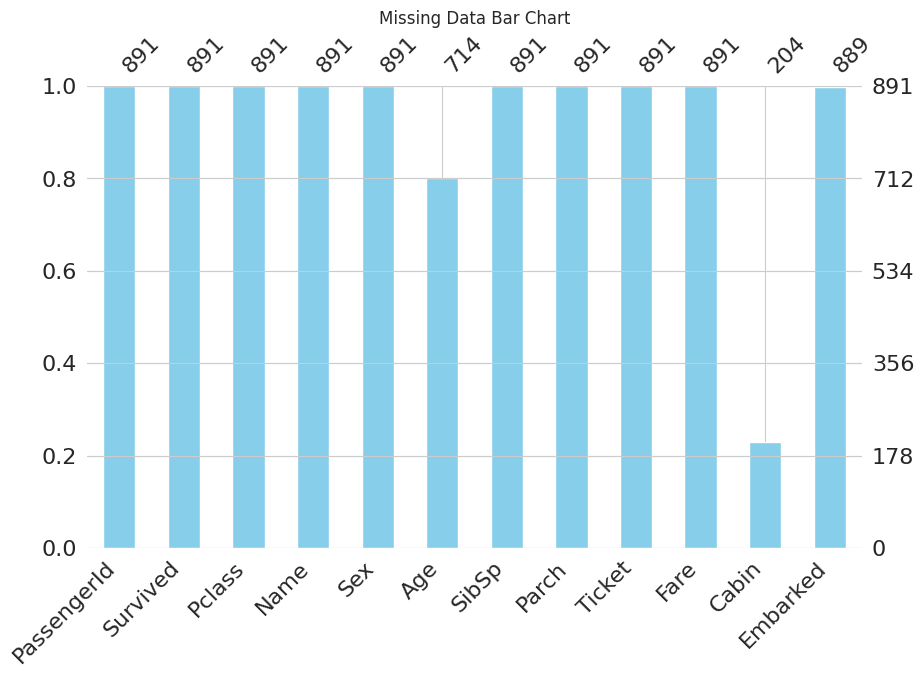

In [10]:
# You might need to install missingno first:
# !pip install missingno

import missingno as msno

print("\nMissing Data Matrix (missingno.matrix):")
msno.matrix(df, figsize=(10, 6), color=(0.2, 0.4, 0.6)) # Custom color
plt.title('Missing Data Nullity Matrix')
plt.show()

print("\nMissing Data Bar Chart (missingno.bar):")
msno.bar(df, figsize=(10, 6), color='skyblue')
plt.title('Missing Data Bar Chart')
plt.show()

    missingno provides specialized and highly informative visualizations for missing data. The matrix() plot is excellent for showing nullity patterns and even row-level missingness, while the bar() plot clearly shows the proportion of non-null values for each feature, making it easy to compare missingness across columns.

5. Strategies for Handling Missing Values

What are we doing here?

Now that we've identified and visualized missing values, we'll apply different techniques to either remove them or fill them in (impute them). The choice of method depends on the nature of the data and the percentage of missing values. We'll work with a copy of the DataFrame to show different methods without altering the original.

Step 5.1: Dropping Rows with Missing Values (dropna())

Explanation:
df.dropna() removes rows (by default) that contain any missing values. This is a simple and quick method, but it can lead to significant data loss if many rows have missing data. We use df_dropped = df.copy() to work on a copy, preserving the original DataFrame for other methods.

In [11]:
print("\n--- Strategy 1: Dropping Rows with Missing Values ---")
df_dropped = df.copy() # Create a copy to work on

initial_rows = df_dropped.shape[0]
df_dropped.dropna(inplace=True) # Removes rows with any NaN value

print(f"Original rows: {initial_rows}")
print(f"Rows after dropping NaNs: {df_dropped.shape[0]}")
print("df_dropped.info():")
df_dropped.info()

# Note: This is often too aggressive for the Titanic dataset due to 'Cabin'


--- Strategy 1: Dropping Rows with Missing Values ---
Original rows: 891
Rows after dropping NaNs: 183
df_dropped.info():
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


    Dropping rows is appropriate when:

    --The number of missing values is very small, and removing rows won't significantly impact your dataset size.

    --The missingness is completely random, and there's no way to reliably impute the values.

    --You need a very clean dataset for specific analyses.
    For the Titanic dataset, dropping rows globally might remove too much data, especially due to the Cabin column, highlighting why other methods are often preferred.

Step 5.2: Dropping Columns with Too Many Missing Values

Explanation:
If a column has a very high percentage of missing values (e.g., >70-80%), it might not provide much useful information, and trying to impute it could introduce too much bias. In such cases, it's often better to drop the entire column. df.drop() is used for this.

In [12]:
print("\n--- Strategy 2: Dropping Columns with High Missing Percentage ---")
df_col_dropped = df.copy()

# Calculate missing percentage again for reference
missing_percentage = (df_col_dropped.isnull().sum() / len(df_col_dropped)) * 100
print("Missing percentage:\n", missing_percentage.round(2))

# Identify columns to drop (e.g., if missing > 70%)
cols_to_drop = missing_percentage[missing_percentage > 70].index.tolist()
print(f"Columns to drop due to high missing percentage: {cols_to_drop}")

df_col_dropped.drop(columns=cols_to_drop, inplace=True)
print("df_col_dropped.info() after dropping high-missing columns:")
df_col_dropped.info()

# Example for Titanic: 'Cabin' will likely be dropped here.


--- Strategy 2: Dropping Columns with High Missing Percentage ---
Missing percentage:
 PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64
Columns to drop due to high missing percentage: ['Cabin']
df_col_dropped.info() after dropping high-missing columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8 

Dropping columns with excessive missing data reduces noise, prevents models from learning from unreliable features, and simplifies the dataset, leading to potentially better model performance and interpretability.

Step 5.3: Imputing Missing Values in Numerical Columns (Mean/Median)

Explanation:
For numerical columns, common imputation strategies are filling with the mean or median.

    Mean: Good for symmetrically distributed data, sensitive to outliers.

    Median: More robust to outliers, preferred for skewed distributions.
    We'll focus on the Age column, which is numerical and has a significant number of missing values.


--- Strategy 3: Imputing Numerical Missing Values (Mean/Median) ---


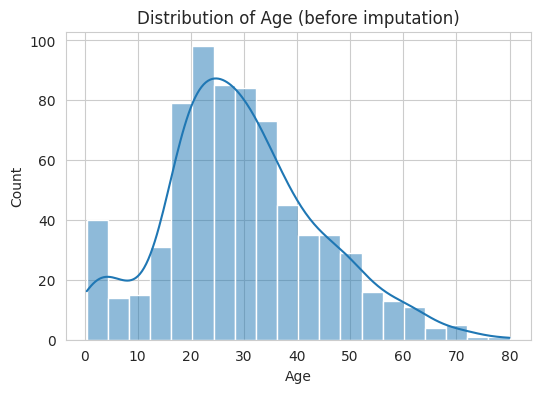

Missing 'Age' values imputed with median: 28.0
df_imputed_num.info() after Age imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


/tmp/ipykernel_31489/4213585979.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_num['Age'].fillna(median_age, inplace=True)


In [13]:
print("\n--- Strategy 3: Imputing Numerical Missing Values (Mean/Median) ---")
df_imputed_num = df_col_dropped.copy() # Start from the DF where 'Cabin' might be dropped

# Check distribution of 'Age' to decide between mean/median
plt.figure(figsize=(6, 4))
sns.histplot(df_imputed_num['Age'].dropna(), kde=True)
plt.title('Distribution of Age (before imputation)')
plt.show()

# Impute 'Age' with the median (more robust to outliers like very old/young passengers)
median_age = df_imputed_num['Age'].median()
df_imputed_num['Age'].fillna(median_age, inplace=True)
print(f"Missing 'Age' values imputed with median: {median_age}")

print("df_imputed_num.info() after Age imputation:")
df_imputed_num.info()

Imputing with mean or median allows us to retain valuable rows of data that would otherwise be lost if we simply dropped them. This is crucial for maintaining dataset size and statistical power, especially when the number of missing values is moderate. The choice between mean and median depends on the data's distribution (check for skewness and outliers).

Step 5.4: Imputing Missing Values in Categorical Columns (Mode)

Explanation:
For categorical columns (e.g., Embarked), the most common strategy is to fill missing values with the mode (the most frequent value). Alternatively, you could fill with a new category like 'Missing' or 'Unknown' if the missingness itself provides information.

In [14]:
print("\n--- Strategy 4: Imputing Categorical Missing Values (Mode) ---")
df_imputed_cat = df_imputed_num.copy() # Continue from the previous step

# Find the mode of the 'Embarked' column
mode_embarked = df_imputed_cat['Embarked'].mode()[0] # .mode() returns a Series, so we take the first element
df_imputed_cat['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Missing 'Embarked' values imputed with mode: {mode_embarked}")

print("df_imputed_cat.info() after Embarked imputation:")
df_imputed_cat.info()

# Verify no more missing values
print("\nFinal check for missing values:")
print(df_imputed_cat.isnull().sum())


--- Strategy 4: Imputing Categorical Missing Values (Mode) ---
Missing 'Embarked' values imputed with mode: S
df_imputed_cat.info() after Embarked imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB

Final check for missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age     

/tmp/ipykernel_31489/2874840431.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_cat['Embarked'].fillna(mode_embarked, inplace=True)


Imputing categorical data with the mode ensures that we maintain the statistical properties of the column while filling in missing data. It's a simple yet effective method when the number of missing categorical values is small. Filling with 'Unknown' is also a valid strategy, especially if the fact that a value is missing is informative.

6. Final Check and Summary

After applying our missing data handling strategies, we'll perform a final check to confirm that all missing values have been addressed and summarize the key transformations made.

Step 6.1: Verify No More Missing Values

Explanation:
We use df.isnull().sum() again on our final processed DataFrame (df_imputed_cat) to ensure that the sum of missing values for all columns is zero.

In [15]:
print("\n--- Final Verification ---")
print("Total missing values in the final DataFrame:")
print(df_imputed_cat.isnull().sum().sum()) # Sum all missing counts from all columns

if df_imputed_cat.isnull().sum().sum() == 0:
    print("\nSuccess! All missing values have been handled.")
else:
    print("\nWarning: Some missing values still remain. Please review previous steps.")


--- Final Verification ---
Total missing values in the final DataFrame:
0

Success! All missing values have been handled.


This step is crucial for quality control. It confirms that our efforts to handle missing data were successful and that our DataFrame is now ready for further analysis or machine learning model training.

Step 6.2: Summarize Transformations and Key Insights

Explanation:
Provide a brief recap of what was done. Which columns had missing data? How were they handled? What's the state of the data now?

## Summary of Missing Data Handling in Titanic Dataset

In this tutorial, we have successfully addressed the missing values in the Titanic dataset. Here's a summary of our actions:

* **Identified** missing values in `Age`, `Cabin`, and `Embarked` columns using `df.info()` and `df.isnull().sum()`.
* **Visualized** missing data patterns using `seaborn.heatmap` (and optionally `missingno`).
* **Dropped** the `Cabin` column due to its high percentage of missing values (approximately 77%).
* **Imputed** missing `Age` values with the **median** to maintain robustness against outliers in its distribution.
* **Imputed** missing `Embarked` values with the **mode** (most frequent value) as it's a categorical feature with few missing entries.

The resulting DataFrame is now clean and prepared for further Exploratory Data Analysis (EDA) or direct use in machine learning models.